# Retail Sales Analysis
This notebook performs exploratory data analysis (EDA) on a retail sales dataset used in the Retail Analysis Dashboard project.

The goal is to:
- Understand sales and revenue patterns
- Analyze store and product performance
- Examine inventory and reorder behavior

The insights from this notebook were used to design the Streamlit dashboard.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load dataset from project data folder
df = pd.read_csv("../data/retail_dataset.csv")

print("Dataset loaded successfully")
print("Shape:", df.shape)

Dataset loaded successfully
Shape: (1000, 12)


In [13]:
df.head()

,transaction_id,date,store_id,product_id,product_name,supplier,unit_price,quantity,discount_pct,total_value,stock_before_txn,reorder_flag
0,T00001,2024-06-14,S04,P005,Hoodie,MetroGoods,1283.93,3,15,3274.02,41,0
1,T00002,2024-03-29,S09,P007,Formal Shirt,MetroGoods,850.88,1,10,765.79,33,0
2,T00003,2024-07-27,S01,P010,Backpack,SupraSupply,1394.03,2,10,2509.25,73,0
3,T00004,2025-01-03,S03,P001,Classic T-Shirt,SupraSupply,192.90,4,5,733.02,66,0
4,T00005,2024-12-14,S10,P007,Formal Shirt,SupraSupply,780.18,2,0,1560.36,46,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    1000 non-null   object 
 1   date              1000 non-null   object 
 2   store_id          1000 non-null   object 
 3   product_id        1000 non-null   object 
 4   product_name      1000 non-null   object 
 5   supplier          1000 non-null   object 
 6   unit_price        1000 non-null   float64
 7   quantity          1000 non-null   int64  
 8   discount_pct      1000 non-null   int64  
 9   total_value       1000 non-null   float64
 10  stock_before_txn  1000 non-null   int64  
 11  reorder_flag      1000 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 93.9+ KB


In [15]:
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

# Check for missing values
df.isna().sum()

transaction_id      0
date                0
store_id            0
product_id          0
product_name        0
supplier            0
unit_price          0
quantity            0
discount_pct        0
total_value         0
stock_before_txn    0
reorder_flag        0
dtype: int64

In [16]:
total_revenue = df["total_value"].sum()
total_transactions = df["transaction_id"].nunique()
average_order_value = total_revenue / total_transactions
reorder_rate = df["reorder_flag"].mean()

print("Total Revenue:", round(total_revenue, 2))
print("Total Transactions:", total_transactions)
print("Average Order Value:", round(average_order_value, 2))
print("Reorder Rate:", round(reorder_rate, 2))

Total Revenue: 2830370.27
Total Transactions: 1000
Average Order Value: 2830.37
Reorder Rate: 0.08


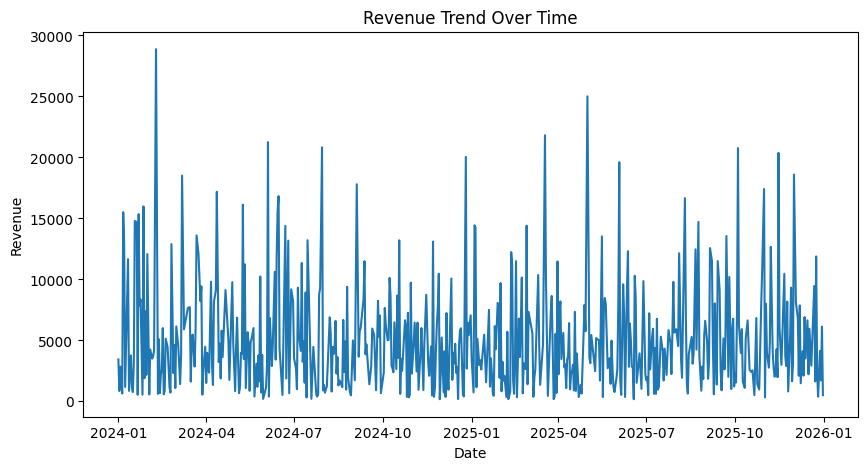

In [17]:
daily_revenue = df.groupby("date")["total_value"].sum()

plt.figure(figsize=(10,5))
plt.plot(daily_revenue.index, daily_revenue.values)
plt.title("Revenue Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

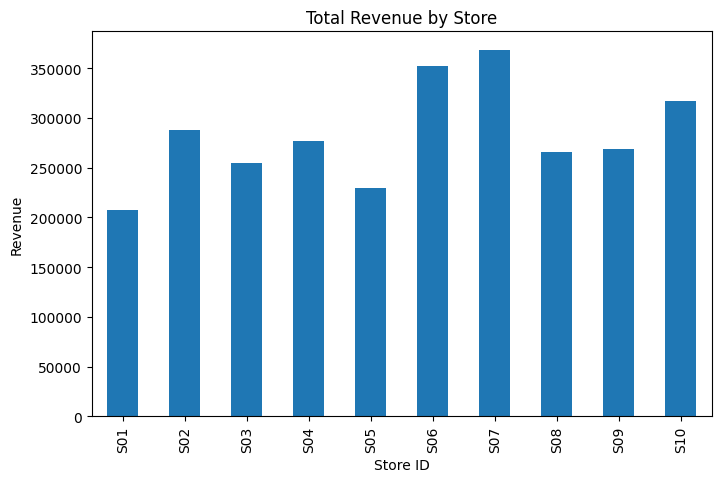

In [18]:
store_revenue = df.groupby("store_id")["total_value"].sum()

plt.figure(figsize=(8,5))
store_revenue.plot(kind="bar")
plt.title("Total Revenue by Store")
plt.xlabel("Store ID")
plt.ylabel("Revenue")
plt.show()

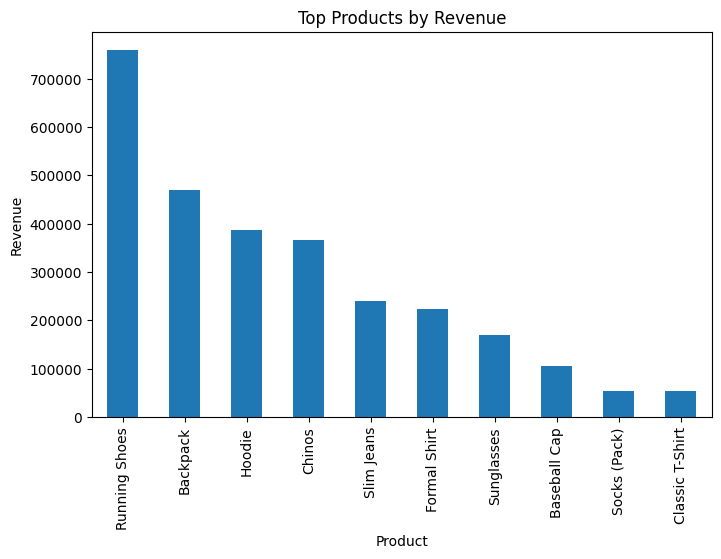

In [19]:
product_revenue = (
    df.groupby("product_name")["total_value"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,5))
product_revenue.plot(kind="bar")
plt.title("Top Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()

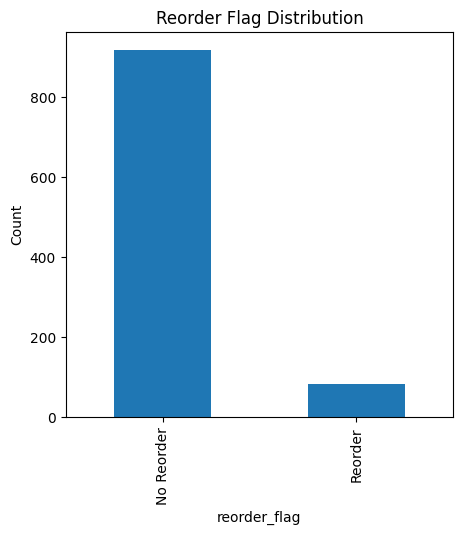

In [20]:
reorder_counts = df["reorder_flag"].value_counts()

plt.figure(figsize=(5,5))
reorder_counts.plot(kind="bar")
plt.title("Reorder Flag Distribution")
plt.xticks([0,1], ["No Reorder", "Reorder"])
plt.ylabel("Count")
plt.show()

## Conclusion

- Revenue varies significantly across stores and products.
- A small subset of products contributes most of the revenue.
- Reorder flags indicate inventory pressure for certain transactions.

These insights were used to design KPIs and visualizations in the Streamlit dashboard.